In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from ipysankeywidget import SankeyWidget


from IPython.display import HTML
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))

# read tables:
perc = pd.read_csv('List_Report_20250609080140.csv')
#perc = pd.read_excel('st_new_raw.xlsx')
chair_mapping = pd.read_excel('chair_mapping_20240801.xlsx')
st_2324 = pd.read_excel('st_2324.xlsx')
# full_entries = pd.read_excel('full_entires_report (1).xlsx')
# no_show = pd.read_excel('member_card_no_shows (2).xlsx')
# barcode_ticket_no_shows = pd.read_excel('barcode_ticket_no_shows.xlsx')

In [2]:

def preprocessing(perc, chair_mapping):

    columns_to_drop = ['Product Id', 'Product', 'Fan / Company','Id',
                      'Street', 'House number', 'Apartment number', 'Zip code','Phone','Organization', 'Vat', 'Date','Stadium',
                      'Seat','Card member Id','Card number','Mifare',"TransactionOwnerType",'Delivery type', 'Ticket Note', 
                      'ReturnRequestStatus','Transaction Note','Voucher value']
    #perc.drop(columns_to_drop,axis = 1,inplace = True)
    
    rename_columns = {
        "Birth date" : 'birth date',
        'City' : "city",
        'Gender': 'gender',
        'Type' : 'status',
        'Date' : 'sale_date',
        'Time' : 'sale_hour',
        'Base price' : 'base_price',
        'Price' : 'price',
        'Ticket price types' : 'price_type',
        'Stand': 'location_name',
        'Price area' : 'price_category',
        'User Id' : 'client_number',
        'Area': 'area',
        'Row' : 'row',
        'assign using email or ID' : "tz",
        'Number': 'seat',
        'Card number': 'card_number',
        'Transaction' : 'transaction',
        'Cashier' : 'purchaser_email',
        'Co-owner' : 'co_purchaser_email',
        'Pelecard_PayType_VisaInstallments': 'payment_type',
        'Voucher number':'voucher_type',
        'Status' : 'st_status'
        
        
    }
    
    
    perc = perc.rename(columns=rename_columns)
    
    presentation_order = {
        'Court_1': 1,
        'Court_2': 2,
        'Court_3': 3,
        'Court_4': 4,
        'Court_5': 5,
        'Court_6': 6,
        'Court_7': 7, 
        'Court_8': 8,
        'Court_9': 9, 
        'Court_10': 10,
        'Court_11': 11, 
        'Court_12': 12, 
        'Gallery_1': 13, 
        'Gallery_2': 14,
        'Gallery_3': 15,
        'Gallery_4': 16,
        'Gallery_5': 17,
        'Gallery_6': 18,
        'Gallery_7': 19,
        'Gallery_8': 20,
        'Gallery_9': 21,
        'Gallery_10': 22,
        'Gallery_11': 23,
        'Gallery_12': 24,
        'Court_side_17': 25, 
        'Court_side_18' : 26 ,
        "Court_side_19" : 27,
        'Suite_1': 28,
        'Suite_2': 29,
        'Suite_3': 30,
        'Suite_4': 32,
        'Suite_5': 33,
        'Suite_6': 34,
        'Suite_7': 35,
        'Suite_8': 36,
        'Suite_9': 37,
        'Suite_10': 38,
        'Suite_11': 39,
        'Suite_12': 40,
        'Suite_13': 41,
        'Suite_14': 42,
        'Suite_15': 43,
        'Suite_16': 44,
        'Suite_21': 45,
        'Unmarked_6':46,
        'Unmarked_12' :47
    }
    
    
    area_mapper = {'אולם 1': 'Court_1',
             'אולם 2': 'Court_2',
             'אולם 3': 'Court_3',
             'אולם 4': 'Court_4',
             'אולם 5': 'Court_5',
             'אולם 6': 'Court_6',
             'אולם 7': 'Court_7',
             'אולם 8': 'Court_8',
             'אולם 9': 'Court_9',
             'אולם 10': 'Court_10',
             'אולם 11': 'Court_11',
             '12 אולם': 'Court_12',
             'גלריה 1': 'Gallery_1',
             'גלריה 2': 'Gallery_2',
             '3 גלריה': 'Gallery_3',       
             'גלריה 4': 'Gallery_4',
             '5 גלריה': 'Gallery_5',
             'גלריה 6': 'Gallery_6',
             'גלריה 7': 'Gallery_7',
             'גלריה 8': 'Gallery_8',
             'גלריה 9': 'Gallery_9',
             'גלריה 10': 'Gallery_10',            
             'גלריה 11': 'Gallery_11',      
             'גלריה 12': 'Gallery_12',
             'פרקט מרכזי': 'Court_side_17',
             'פרקט צפוני': 'Court_side_18',
             'פרקט דרומי': 'Court_side_19',
             'תא 1': 'Suite_1',
             'תא 2': 'Suite_2',
             'תא 3': 'Suite_3',
             'תא 4': 'Suite_4',
             'תא 5': 'Suite_5',
             'תא 6': 'Suite_6',
             'תא 7': 'Suite_7',
             'תא 8': 'Suite_8',
             'תא 9': 'Suite_9',
             'תא 10': 'Suite_10',
             'תא 11': 'Suite_11',
             'תא 12': 'Suite_12',
             'תא 13': 'Suite_13',
             'תא 14': 'Suite_14',
             'תא 15': 'Suite_15',
             'תא 16': 'Suite_16',
             '1C': 'Court_1'}


    #perc = perc[perc['status'] == 'Sale'].reset_index()
    perc['price'] = pd.to_numeric(perc['price'], errors='coerce').fillna(0)
    perc = perc[perc['st_status'] == 'Active'].reset_index()
    perc['area'] = perc['area'].replace(area_mapper)

    # perc['full_datetime'] = pd.to_datetime(perc['sale_date'], format='%m/%d/%Y %H:%M', errors='coerce')
    # perc['sale_date'] = pd.to_datetime(perc['sale_date'], errors='coerce')
    # perc['sale_hour'] = perc['full_datetime'].dt.strftime('%H:%M')

    # perc['weekday_sale'] = perc['sale_date'].dt.day_name()

    # Parse 'full_datetime' to datetime and split into 'sale_date' and 'sale_hour'
    perc['full_datetime'] = pd.to_datetime(perc['sale_date'], format='%m/%d/%Y %H:%M', errors='coerce')
    
    # Extract only the date part for 'sale_date'
    perc['sale_date'] = perc['full_datetime'].dt.date
    
    # Extract only the time part (hour and minute) for 'sale_hour'
    perc['sale_hour'] = perc['full_datetime'].dt.strftime('%H:%M')
    
    # Extract weekday from 'sale_date'
    perc['weekday_sale'] = pd.to_datetime(perc['sale_date']).dt.day_name()

    perc['is_renew'] = perc['price_type'].str.contains('renew')
    perc['price_type'] = perc['price_type'].str.replace(' (renew)', '', regex=False)
    perc['hapoels_purchaser'] =  perc['purchaser_email'].str.contains('hapoel|Hapoel|HAPOEL', na=False)

    capacity = chair_mapping.groupby('section_name').count()['seat_id'].reset_index().rename(columns={'seat_id': 'area_capacity'})

    return perc, capacity, presentation_order

perc,capacity, presentation_order  = preprocessing(perc,chair_mapping)

In [ ]:
# perc = pd.read_csv('st_raw_20241206.csv')

In [3]:
columns_to_drop = ['Product Id', 'Product', 'Fan / Company','Id',
                  'Street', 'House number', 'Apartment number', 'Zip code','Phone','Organization', 'Vat', 'Date','Stadium',
                  'Seat','Card member Id','Card number','Mifare',"TransactionOwnerType",'Delivery type', 'Ticket Note', 
                  'ReturnRequestStatus','Transaction Note','Voucher value']
#perc.drop(columns_to_drop,axis = 1,inplace = True)

rename_columns = {
    "Birth date" : 'birth date',
    'City' : "city",
    'Gender': 'gender',
    'Type' : 'status',
    'Date' : 'sale_date',
    'Time' : 'sale_hour',
    'Base price' : 'base_price',
    'Price' : 'price',
    'Ticket price types' : 'price_type',
    'Stand': 'location_name',
    'Price area' : 'price_category',
    'User Id' : 'client_number',
    'Area': 'area',
    'Row' : 'row',
    'assign using email or ID' : "tz",
    'Number': 'seat',
    'Card number': 'card_number',
    'Transaction' : 'transaction',
    'Cashier' : 'purchaser_email',
    'Co-owner' : 'co_purchaser_email',
    'Pelecard_PayType_VisaInstallments': 'payment_type',
    'Voucher number':'voucher_type',
    'Status' : 'st_status'
    
    
}


perc = perc.rename(columns=rename_columns)

presentation_order = {
    'Court_1': 1,
    'Court_2': 2,
    'Court_3': 3,
    'Court_4': 4,
    'Court_5': 5,
    'Court_6': 6,
    'Court_7': 7, 
    'Court_8': 8,
    'Court_9': 9, 
    'Court_10': 10,
    'Court_11': 11, 
    'Court_12': 12, 
    'Gallery_1': 13, 
    'Gallery_2': 14,
    'Gallery_3': 15,
    'Gallery_4': 16,
    'Gallery_5': 17,
    'Gallery_6': 18,
    'Gallery_7': 19,
    'Gallery_8': 20,
    'Gallery_9': 21,
    'Gallery_10': 22,
    'Gallery_11': 23,
    'Gallery_12': 24,
    'Court_side_17': 25, 
    'Court_side_18' : 26 ,
    "Court_side_19" : 27,
    'Suite_1': 28,
    'Suite_2': 29,
    'Suite_3': 30,
    'Suite_4': 32,
    'Suite_5': 33,
    'Suite_6': 34,
    'Suite_7': 35,
    'Suite_8': 36,
    'Suite_9': 37,
    'Suite_10': 38,
    'Suite_11': 39,
    'Suite_12': 40,
    'Suite_13': 41,
    'Suite_14': 42,
    'Suite_15': 43,
    'Suite_16': 44,
    'Suite_21': 45,
    'Unmarked_6':46,
    'Unmarked_12' :47
}


area_mapper = {'אולם 1': 'Court_1',
         'אולם 2': 'Court_2',
         'אולם 3': 'Court_3',
         'אולם 4': 'Court_4',
         'אולם 5': 'Court_5',
         'אולם 6': 'Court_6',
         'אולם 7': 'Court_7',
         'אולם 8': 'Court_8',
         'אולם 9': 'Court_9',
         'אולם 10': 'Court_10',
         'אולם 11': 'Court_11',
         '12 אולם': 'Court_12',
         'גלריה 1': 'Gallery_1',
         'גלריה 2': 'Gallery_2',
         '3 גלריה': 'Gallery_3',       
         'גלריה 4': 'Gallery_4',
         '5 גלריה': 'Gallery_5',
         'גלריה 6': 'Gallery_6',
         'גלריה 7': 'Gallery_7',
         'גלריה 8': 'Gallery_8',
         'גלריה 9': 'Gallery_9',
         'גלריה 10': 'Gallery_10',            
         'גלריה 11': 'Gallery_11',      
         'גלריה 12': 'Gallery_12',
         'פרקט מרכזי': 'Court_side_17',
         'פרקט צפוני': 'Court_side_18',
         'פרקט דרומי': 'Court_side_19',
         'תא 1': 'Suite_1',
         'תא 2': 'Suite_2',
         'תא 3': 'Suite_3',
         'תא 4': 'Suite_4',
         'תא 5': 'Suite_5',
         'תא 6': 'Suite_6',
         'תא 7': 'Suite_7',
         'תא 8': 'Suite_8',
         'תא 9': 'Suite_9',
         'תא 10': 'Suite_10',
         'תא 11': 'Suite_11',
         'תא 12': 'Suite_12',
         'תא 13': 'Suite_13',
         'תא 14': 'Suite_14',
         'תא 15': 'Suite_15',
         'תא 16': 'Suite_16',
         '1C': 'Court_1'}


#perc = perc[perc['status'] == 'Sale'].reset_index()
perc['price'] = pd.to_numeric(perc['price'], errors='coerce').fillna(0)
perc = perc[perc['st_status'] == 'Active'].reset_index()
perc['area'] = perc['area'].replace(area_mapper)

In [4]:
# perc['full_datetime'] = pd.to_datetime(perc['sale_date'], format='%m/%d/%Y %H:%M', errors='coerce')
# perc['sale_date'] = pd.to_datetime(perc['sale_date'], errors='coerce')
# perc['sale_hour'] = perc['full_datetime'].dt.strftime('%H:%M')

# perc['weekday_sale'] = perc['sale_date'].dt.day_name()

# Parse 'full_datetime' to datetime and split into 'sale_date' and 'sale_hour'
perc['full_datetime'] = pd.to_datetime(perc['sale_date'], format='%m/%d/%Y %H:%M', errors='coerce')

# Extract only the date part for 'sale_date'
perc['sale_date'] = perc['full_datetime'].dt.date

# Extract only the time part (hour and minute) for 'sale_hour'
perc['sale_hour'] = perc['full_datetime'].dt.strftime('%H:%M')

# Extract weekday from 'sale_date'
perc['weekday_sale'] = pd.to_datetime(perc['sale_date']).dt.day_name()

perc['is_renew'] = perc['price_type'].str.contains('renew')
perc['price_type'] = perc['price_type'].str.replace(' (renew)', '', regex=False)
perc['hapoels_purchaser'] =  perc['purchaser_email'].str.contains('hapoel|Hapoel|HAPOEL', na=False)

capacity = chair_mapping.groupby('section_name').count()['seat_id'].reset_index().rename(columns={'seat_id': 'area_capacity'})

In [5]:
perc['sale_date'] = pd.to_datetime(perc['sale_date'])

# Split into 'sale_date' and 'sale_hour'
perc['sale_hour'] = perc['sale_date'].dt.strftime('%I:%M %p')
perc['sale_date'] = perc['sale_date'].dt.strftime('%m/%d/%Y')

# Extract weekday
perc['weekday_sale'] = pd.to_datetime(perc['sale_date']).dt.day_name()

In [6]:
perc['is_renew'] = perc['price_type'].str.contains('renew')
perc['price_type'] = perc['price_type'].str.replace(' (renew)', '', regex=False)
perc['hapoels_purchaser'] =  perc['purchaser_email'].str.contains('hapoel|Hapoel|HAPOEL', na=False)

In [7]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def distributed_by_area(perc, capacity, presentation_order, st_2324, chair_mapping):
    # Preparing last year's data
    st_2324 = st_2324.merge(chair_mapping[['seat_id', 'section_name']], on='seat_id', how='left')
    last_year_tickets = st_2324[st_2324['price'] > 0].groupby('section_name').count()['season_id'].reset_index()
    last_year_tickets.columns = ['area', 'last_year_tickets']

    # Preparing current year's data
    stats_by_Court = perc.groupby(['area']).apply(lambda x: pd.Series({
        'Season_Tickets_Renew': (x['is_renew']).sum(),
        'Season_Tickets_New': (~x['is_renew']).sum(),
        'Total_Price': x['price'].sum()
    })).reset_index()
    
    stats_by_Court['area_velocity'] = stats_by_Court[['Season_Tickets_Renew', 'Season_Tickets_New']].sum(axis=1)
    stats_by_Court['presentation_order'] = stats_by_Court['area'].map(presentation_order)
    stats_by_Court = stats_by_Court.sort_values(by='presentation_order')
    
    # Merge with last year's data
    stats_by_Court = stats_by_Court.merge(last_year_tickets, on='area', how='left')
    stats_by_Court = stats_by_Court[stats_by_Court['area_velocity'] > 0]  # Exclude sections with 0 tickets this year
    
    stats_by_Court['remaining_capacity'] = stats_by_Court['last_year_tickets'] - stats_by_Court['area_velocity']
    stats_by_Court['fixed_remaining_capacity'] = np.maximum(stats_by_Court['remaining_capacity'], 0)
    stats_by_Court['ratio_capacity'] = stats_by_Court['area_velocity'] / stats_by_Court['last_year_tickets']
    stats_by_Court['ratio_capacity'] = np.minimum(stats_by_Court['ratio_capacity'], 1)
    stats_by_Court['ratio_capacity'] = stats_by_Court['ratio_capacity'].fillna(1)
    stats_by_Court['ratio_capacity_percent'] = (stats_by_Court['ratio_capacity'] * 100).round().astype(int).astype(str) + '%'
    
    stats_by_Court['total_tickets'] = stats_by_Court['area_velocity'] + stats_by_Court['fixed_remaining_capacity']
    
    stats_by_Court['velocity_hover_text'] = stats_by_Court.apply(lambda x: f"{x['area_velocity']} Tickets<br>({x['area_velocity']/x['total_tickets']:.2%} of total)", axis=1)
    stats_by_Court['remaining_capacity_hover_text'] = stats_by_Court.apply(lambda x: f"{x['fixed_remaining_capacity']} Tickets<br>({x['fixed_remaining_capacity']/x['total_tickets']:.2%} of total)", axis=1)
    stats_by_Court['Season_Tickets_Renew_hover_text'] = stats_by_Court.apply(lambda x: f"{x['Season_Tickets_Renew']} Tickets<br>({x['Season_Tickets_Renew']/x['total_tickets']:.2%} of total)", axis=1)
    stats_by_Court['Season_Tickets_New_hover_text'] = stats_by_Court.apply(lambda x: f"{x['Season_Tickets_New']} Tickets<br>({x['Season_Tickets_New']/x['total_tickets']:.2%} of total)", axis=1)
    stats_by_Court['Total_Price'] = pd.to_numeric(stats_by_Court['Total_Price'], errors='coerce').fillna(0)

    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=stats_by_Court['area'], 
        y=stats_by_Court['Season_Tickets_Renew'], 
        name='Season Tickets Renewals', 
        marker_color='red',
        hovertext=stats_by_Court['Season_Tickets_Renew_hover_text'],
        hoverinfo='text',
        text=stats_by_Court['Season_Tickets_Renew'],
        textposition='inside'
    ))

    fig.add_trace(go.Bar(
        x=stats_by_Court['area'], 
        y=stats_by_Court['Season_Tickets_New'], 
        name='New Season Tickets', 
        marker_color='blue',
        hovertext=stats_by_Court['Season_Tickets_New_hover_text'],
        hoverinfo='text',
        text=stats_by_Court['Season_Tickets_New'],
        textposition='inside'
    ))

    fig.add_trace(go.Bar(
        x=stats_by_Court['area'], 
        y=stats_by_Court['fixed_remaining_capacity'], 
        name='Last Year Season Tickets', 
        marker_color='grey',
        base=stats_by_Court['area_velocity'],
        hovertext=stats_by_Court['remaining_capacity_hover_text'],
        hoverinfo='text',
        text=stats_by_Court['fixed_remaining_capacity'],
        textposition='inside'
    ))

    fig.update_layout(
        title=dict(
            text='Season Ticket by Section',
            font=dict(size=20)
        ),
        xaxis=dict(
            title='', 
            tickangle=45, 
            title_font=dict(size=22),
            tickfont=dict(size=22)
        ),
        yaxis=dict(title='Season Tickets', title_font=dict(size=22), tickfont=dict(size=22)),
        barmode='stack',
        legend=dict(x=0.9, y=0.99, bordercolor="Black", borderwidth=1, font=dict(size=12)),
        margin=dict(l=20, r=20, t=40, b=20),
        width=1000, 
        height=800,
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_x=0.25
    )

    for area, total_price in zip(stats_by_Court['area'], stats_by_Court['Total_Price']):
        fig.add_annotation(x=area, y=0, text=f"{total_price:,.0f}|", showarrow=False, yshift=-20, font=dict(size=7, color="black"))

    for area, pct, y in zip(stats_by_Court['area'], stats_by_Court['ratio_capacity_percent'], stats_by_Court['area_velocity']):
        fig.add_annotation(x=area, y=y, text=pct, showarrow=False, yshift=10)

    fig.show('iframe')

# Example usage
distributed_by_area(perc, capacity, presentation_order, st_2324, chair_mapping)


/var/folders/nt/lqq9984n7p3fpfvd92swmw280000gn/T/ipykernel_29377/407562051.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_Court = perc.groupby(['area']).apply(lambda x: pd.Series({


In [8]:
perc['sale_date'] = pd.to_datetime(perc['sale_date'])
Total_Sales = perc.groupby(perc['sale_date'].dt.date)['price'].size().reset_index(name="Total_sale")


In [9]:
perc['sale_date']

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4325   NaT
4326   NaT
4327   NaT
4328   NaT
4329   NaT
Name: sale_date, Length: 4330, dtype: datetime64[ns]

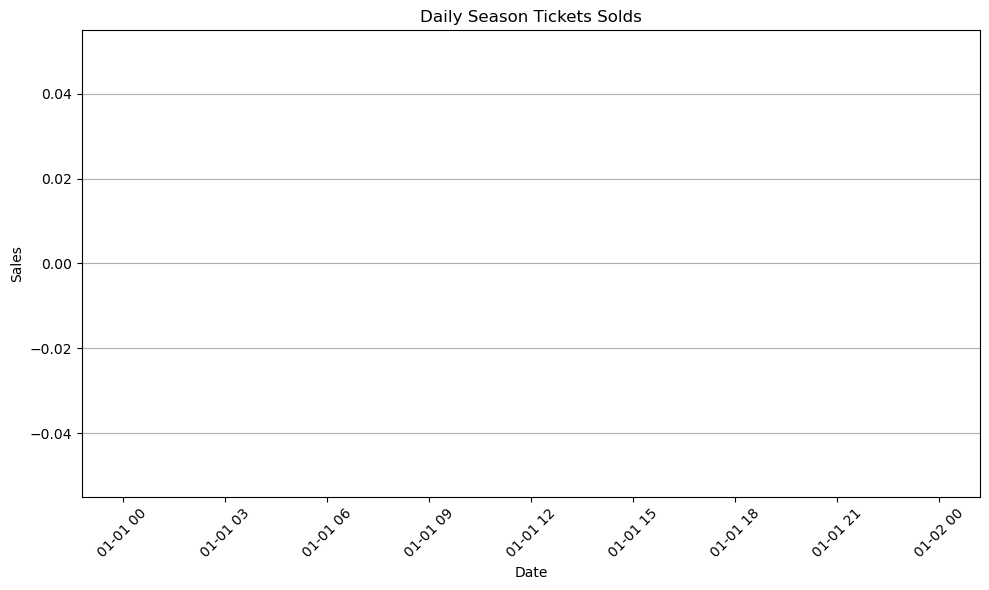

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


perc['sale_date'] = pd.to_datetime(perc['sale_date'])
Total_Sales = perc.groupby(perc['sale_date'].dt.date)['price'].size().reset_index(name="Total_sale")

plt.figure(figsize=(10, 6))
bars = plt.bar(Total_Sales['sale_date'], Total_Sales['Total_sale'], color='red')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Daily Season Tickets Solds')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


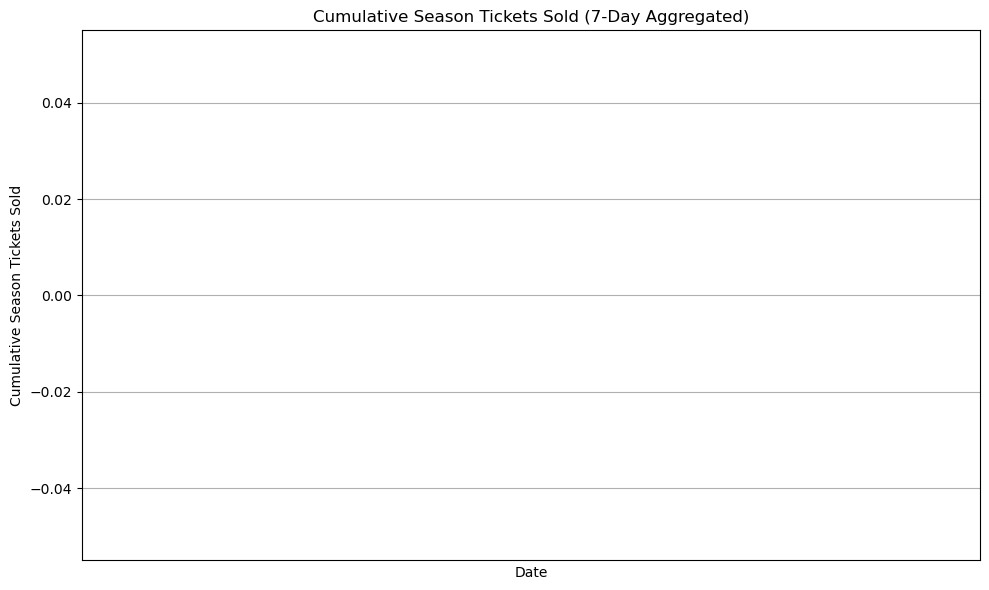

In [11]:
def plot_cumulative_sales(dataframe, date_column, days):

    dataframe[date_column] = pd.to_datetime(dataframe[date_column], errors='coerce')
    
    # Define the function to calculate the end of the n-day period
    def end_of_n_day_period(date, n):
        # Check if the date is NaT
        if pd.isna(date):
            return pd.NaT
        day_of_year = date.dayofyear
        # Calculate the number of days to add
        days_to_add = n - 1 - (day_of_year % n)
        return date + pd.Timedelta(days=days_to_add)
    
    # Apply the function to create the n-day period column
    dataframe['n_day_period'] = dataframe[date_column].apply(lambda x: end_of_n_day_period(x, days))
    
    # Group by n-day period and calculate cumulative sales
    Total_Sales_n_day = dataframe.groupby('n_day_period').size().reset_index(name="Total_Sales")
    Total_Sales_n_day['Cumulative_Sales'] = Total_Sales_n_day['Total_Sales'].cumsum()

    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(Total_Sales_n_day['n_day_period'], Total_Sales_n_day['Cumulative_Sales'], color='red')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=8)

    plt.xticks(Total_Sales_n_day['n_day_period'], Total_Sales_n_day['n_day_period'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.title(f'Cumulative Season Tickets Sold ({days}-Day Aggregated)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Season Tickets Sold')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

days = 7
plot_cumulative_sales(perc, 'sale_date', days)


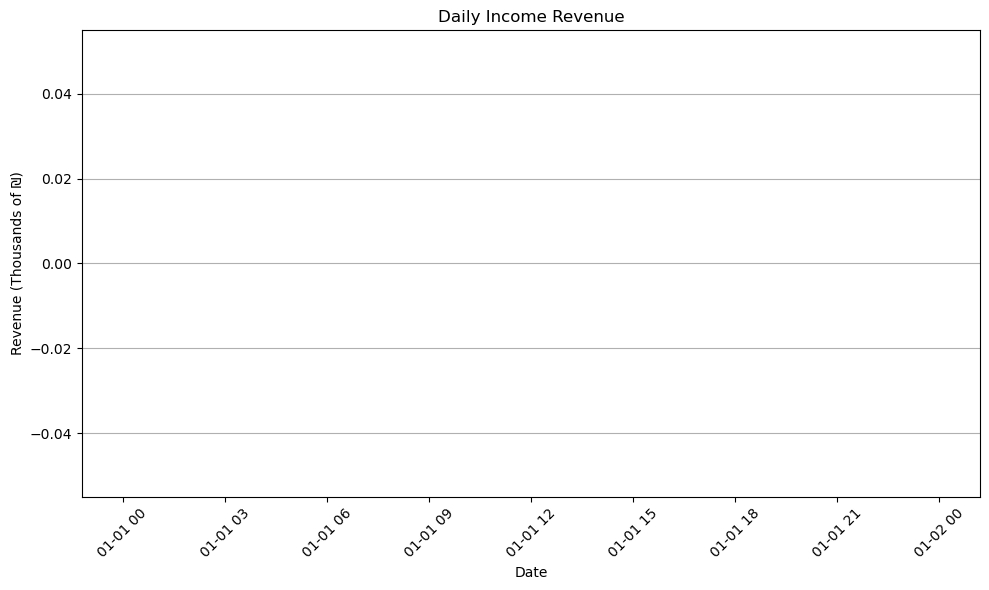

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


perc['sale_date'] = pd.to_datetime(perc['sale_date'])
Total_Sales = perc.groupby(perc['sale_date'].dt.date)['price'].sum().reset_index(name="Total_revenue")
Total_Sales['Total_revenue_thousands'] = Total_Sales['Total_revenue'] / 1000

plt.figure(figsize=(10, 6))
bars = plt.bar(Total_Sales['sale_date'], Total_Sales['Total_revenue_thousands'], color='red')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}₪', ha='center', va='bottom', fontsize=10)

plt.title('Daily Income Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (Thousands of ₪)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


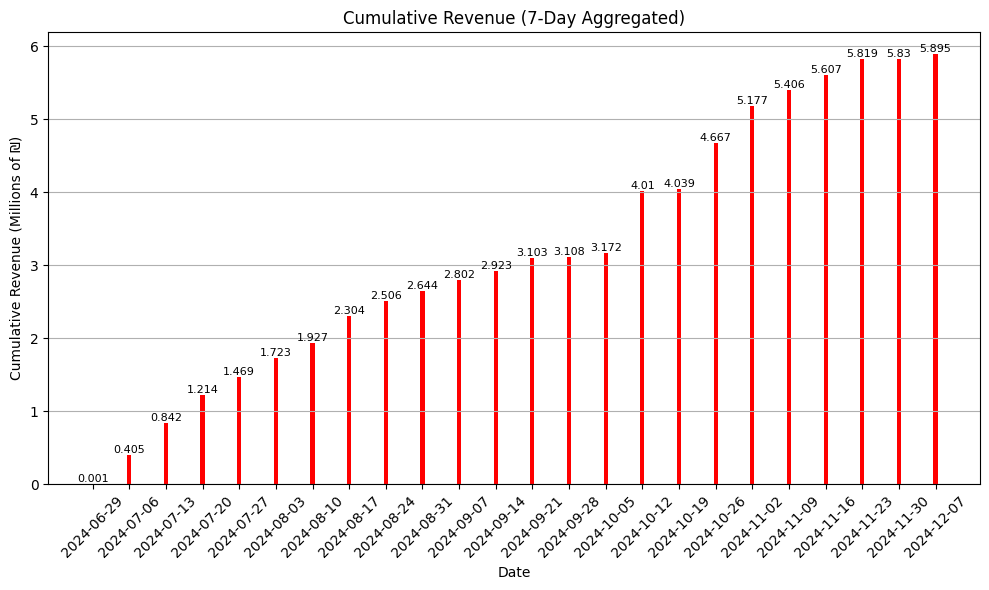

In [31]:
def plot_cumulative_revenue(dataframe, date_column,revenue_column, days):

    dataframe[date_column] = pd.to_datetime(dataframe[date_column], errors='coerce')
    def end_of_n_day_period(date, n):
        if pd.isna(date):
            return pd.NaT
        day_of_year = date.dayofyear
        days_to_add = n - 1 - (day_of_year % n)
        return date + pd.Timedelta(days=days_to_add)
    
    dataframe['n_day_period'] = dataframe[date_column].apply(lambda x: end_of_n_day_period(x, days))
    
    Total_Sales_n_day = dataframe.groupby('n_day_period')[revenue_column].sum().reset_index(name="Total_revenue")
    Total_Sales_n_day['Cumulative_Revenue'] = Total_Sales_n_day['Total_revenue'].cumsum()
    Total_Sales_n_day['Cumulative_Revenue_thousands'] = round(Total_Sales_n_day['Cumulative_Revenue'] / 1000000,3)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(Total_Sales_n_day['n_day_period'], Total_Sales_n_day['Cumulative_Revenue_thousands'], color='red')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=8)

    plt.xticks(Total_Sales_n_day['n_day_period'], Total_Sales_n_day['n_day_period'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.title(f'Cumulative Revenue ({days}-Day Aggregated)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Revenue (Millions of ₪)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

days = 7
plot_cumulative_revenue(perc, 'sale_date', 'price', days)


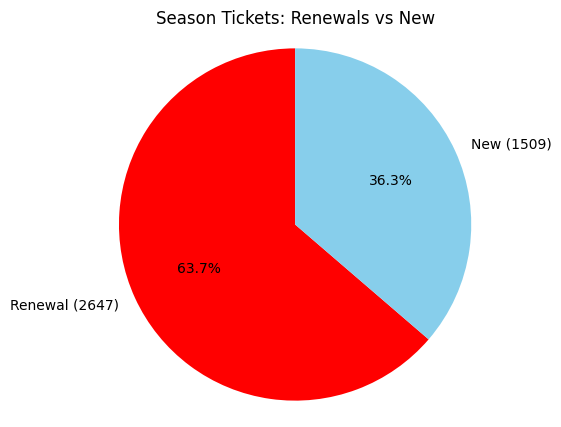

In [32]:

renewal_counts = perc['is_renew'].value_counts()

# Creating labels with actual values and percentages
labels = [ f'Renewal ({renewal_counts[True]})',f'New ({renewal_counts[False]})']

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(renewal_counts, labels=labels, autopct='%1.1f%%', colors=['red', 'skyblue'], startangle=90)
plt.title('Season Tickets: Renewals vs New')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()


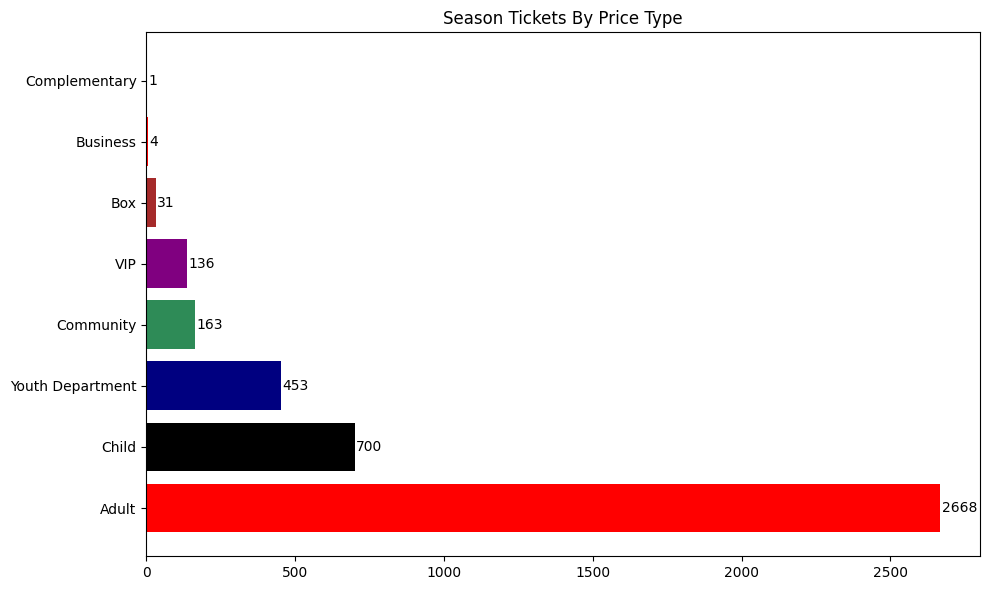

In [34]:
renewal_counts = perc['price_type'].value_counts().reset_index()
renewal_counts['price_type'] = renewal_counts['price_type'].str.replace(' (upgrade)','')
# renewal_counts = renewal_counts.groupby('price_type').sum()['count']
renewal_counts['price_type'] = renewal_counts['price_type'].replace({'עסקי': 'Business'})
renewal_counts['price_type'] = renewal_counts['price_type'].apply(lambda x: 'VIP' if 'VIP' in x else x)
renewal_counts['price_type'] = renewal_counts['price_type'].apply(lambda x: 'Youth Department' if 'מחלקת נוער' in x else x)
renewal_counts = renewal_counts.groupby('price_type').sum()['count'].reset_index().sort_values('count',ascending=False)


plt.figure(figsize=(10, 6))
bars = plt.barh(renewal_counts['price_type'], renewal_counts['count'], color=['red', 'black', 'navy', 'seagreen', 'purple', 'brown'])
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center')
plt.title('Season Tickets By Price Type')
plt.tight_layout()
plt.show()


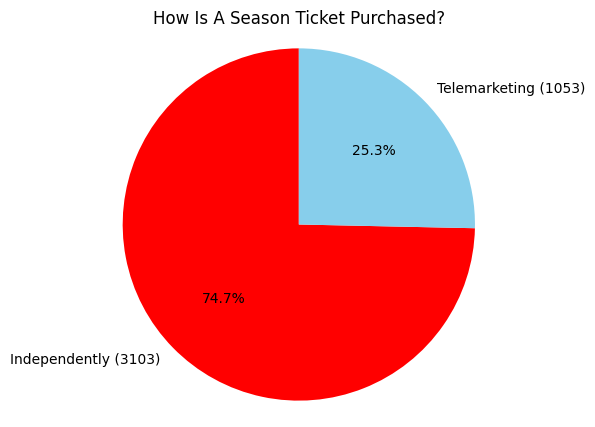

In [35]:

renewal_counts = perc['hapoels_purchaser'].value_counts()

# Creating labels with actual values and percentages
labels = [f'Independently ({renewal_counts[True]})', f'Telemarketing ({renewal_counts[False]})']

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(renewal_counts, labels=labels, autopct='%1.1f%%', colors=['red', 'skyblue'], startangle=90)
plt.title('How Is A Season Ticket Purchased?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()


In [36]:

season_22 = perc.copy()
season_21 = st_2324.copy()

season_22 = season_22[season_22['is_renew'] == True]
transitions = season_21[['client_number', 'price_category']].rename(columns={'price_category': 'price_category_21'})
transitions = transitions.merge(season_22[['client_number', 'price_category']].rename(columns={'price_category': 'price_category_22'}), on='client_number', how='right')
transitions = transitions[transitions['price_category_21'].notna()].drop(columns=["client_number"])

def aggregate_sankey_data(df):
    pair_counts = {}  # Dictionary to store tuple counts

    # Iterate and count pairs
    for index, row in df.iterrows():
        pair = (row['price_category_21'], row['price_category_22'])
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1

    links = [["source","target","type","value"]]  # List to store Sankey links

    # Create link dictionaries
    for pair, count in pair_counts.items():

        links.append([
            pair[0],
            str(pair[1]) + '  ',
            pair[1],
            count
        ])
    print(links)
    return links 

data = aggregate_sankey_data(transitions)
data = pd.DataFrame(data)
data.columns = data.iloc[0]
data = data[1:]
data = data[data['value'].astype(int) > 5]
data = data[data['source'] != 'nan']
SankeyWidget(links=data.to_dict('records'))



[['source', 'target', 'type', 'value'], ['B', 'B  ', 'B', 487], ['A', 'A  ', 'A', 380], ['Silver', 'Silver  ', 'Silver', 140], ['D', 'Silver  ', 'Silver', 9], ['D', 'C  ', 'C', 36], ['F', 'D  ', 'D', 10], ['D', 'D  ', 'D', 692], ['Gold', 'A  ', 'A', 5], ['F', 'A  ', 'A', 15], ['D', 'A  ', 'A', 20], ['Silver', 'C  ', 'C', 7], ['C', 'C  ', 'C', 407], ['A', 'Silver  ', 'Silver', 13], ['C', 'F  ', 'F', 15], ['Silver', 'F  ', 'F', 46], ['C', 'Silver  ', 'Silver', 11], ['C', 'B  ', 'B', 73], ['Silver', 'B  ', 'B', 4], ['B', 'F  ', 'F', 4], ['E', 'E  ', 'E', 24], ['E', 'Silver  ', 'Silver', 2], ['D', 'B  ', 'B', 40], ['Gold', 'Gold  ', 'Gold', 18], ['Gold', 'B  ', 'B', 16], ['Gold', 'D  ', 'D', 8], ['B', 'D  ', 'D', 9], ['C', 'D  ', 'D', 16], ['Gold', 'F  ', 'F', 4], ['F', 'F  ', 'F', 176], ['F', 'Gold  ', 'Gold', 2], ['A', 'F  ', 'F', 3], ['Court_side', 'F  ', 'F', 4], ['Court_side', 'B  ', 'B', 4], ['A', 'B  ', 'B', 2], ['Court_side', 'A  ', 'A', 8], ['B', 'A  ', 'A', 12], ['D', 'E  ', 'E',

SankeyWidget(links=[{'source': 'B', 'target': 'B  ', 'type': 'B', 'value': 487}, {'source': 'A', 'target': 'A …

C:\Users\Matan\AppData\Local\Temp\ipykernel_14776\2142855817.py:19: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



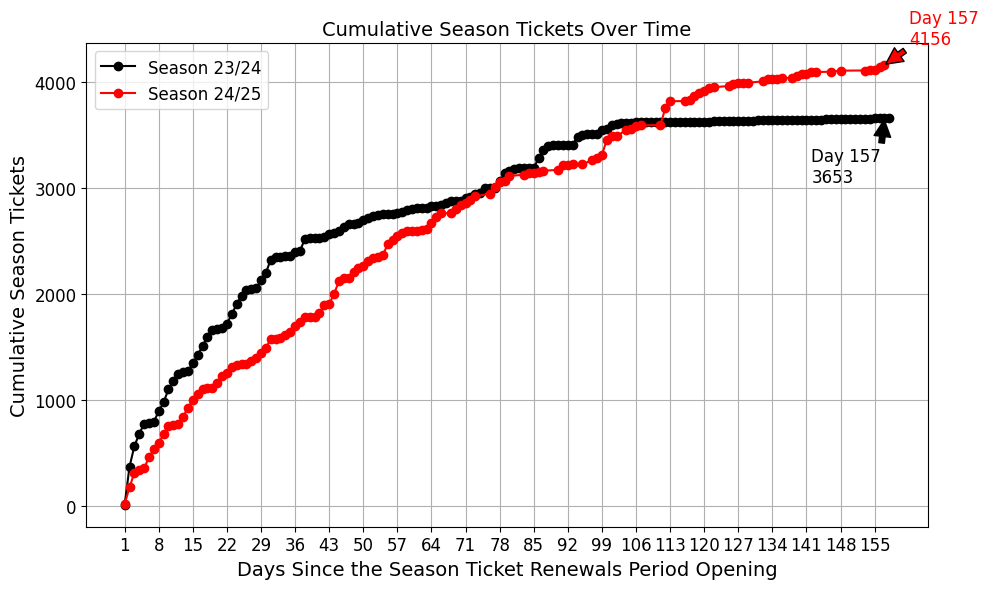

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming st_2324 and perc are already defined DataFrames

daily_data = st_2324.groupby('sale_date').count()['client_number'].reset_index(name='daily_season_tickets').rename(columns={'sale_date': 'Date'})
daily_data['Cumulative Subscribers'] = daily_data['daily_season_tickets'].cumsum()
daily_data = daily_data[daily_data["Date"] >= pd.to_datetime("2023-06-25")]
daily_data['Days Since Opening'] = (daily_data['Date'] - daily_data['Date'].min()).dt.days + 1 
daily_data["Date"] = pd.to_datetime(daily_data["Date"])
daily_data = daily_data[daily_data['Days Since Opening'] < 160]

#complete missing dates
full_date_range = pd.date_range(start=daily_data['Date'].min(), end=daily_data['Date'].max())
daily_data = daily_data.set_index('Date').reindex(full_date_range).reset_index()
daily_data = daily_data.rename(columns={'index': 'Date'})
daily_data['Days Since Opening'] = (daily_data['Date'] - daily_data['Date'].min()).dt.days + 1
daily_data['daily_season_tickets'] = daily_data['daily_season_tickets'].fillna(0)
daily_data['Cumulative Subscribers'] = daily_data['Cumulative Subscribers'].fillna(method='ffill').astype(int)



daily_st_2425 = perc.groupby('sale_date').count()['client_number'].reset_index(name='daily_season_tickets').rename(columns={'sale_date': 'Date'})
daily_st_2425['Cumulative Subscribers'] = daily_st_2425['daily_season_tickets'].cumsum()
daily_st_2425 = daily_st_2425[daily_st_2425["Date"] >= pd.to_datetime("2024-07-02")]
daily_st_2425['Days Since Opening'] = (daily_st_2425['Date'] - daily_st_2425['Date'].min()).dt.days + 1
daily_st_2425["Date"] = pd.to_datetime(daily_st_2425["Date"])

plt.figure(figsize=(10, 6))
plt.plot(daily_data['Days Since Opening'], daily_data['Cumulative Subscribers'], marker='o', color='black', label='Season 23/24')
plt.plot(daily_st_2425['Days Since Opening'], daily_st_2425['Cumulative Subscribers'], marker='o', color='red', label='Season 24/25')
plt.xticks(range(1, daily_data['Days Since Opening'].max() + 1, 7), fontsize=12)
plt.yticks(fontsize=12)

plt.title('Cumulative Season Tickets Over Time', fontsize=14)
plt.xlabel('Days Since the Season Ticket Renewals Period Opening', fontsize=14)
plt.ylabel('Cumulative Season Tickets', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.gca().set_facecolor('white') 

#Adding annotations for the last day number value and respective day value
last_day_2425 = daily_st_2425['Days Since Opening'].max()
last_day_value_2425 = daily_st_2425[daily_st_2425['Days Since Opening'] == last_day_2425]['Cumulative Subscribers'].values[0]

# Find the corresponding value for daily_data on the same day as the last_day_2425
last_day_value_data = daily_data[daily_data['Days Since Opening'] == last_day_2425]['Cumulative Subscribers'].values[0]

plt.annotate(f'Day {last_day_2425}\n{last_day_value_2425}', 
             xy=(last_day_2425, last_day_value_2425), 
             xytext=(last_day_2425 + 5, last_day_value_2425+200), 
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.annotate(f'Day {last_day_2425}\n{last_day_value_data}', 
             xy=(last_day_2425, last_day_value_data), 
             xytext=(last_day_2425 - 15, last_day_value_data-600), 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [56]:
st_2324[st_2324['notes'] == 'בנק מזרחי מנויים']

,Unnamed: 0,season_id,client_number,seat_id,price_category,price,is_adult,is_vip,purchaser_client_number,sale_date,notes
4329,4330,23,14849,20409009,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4330,4331,23,14849,20409010,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4331,4332,23,14849,20409011,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4332,4333,23,14849,20409012,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4333,4334,23,14849,20409013,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4334,4335,23,14849,20409014,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4335,4336,23,14849,20409015,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4336,4337,23,14849,20409016,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4337,4338,23,14849,20409017,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים
4338,4339,23,14849,20409018,A,2650,True,False,14849,2023-08-01,בנק מזרחי מנויים


C:\Users\Matan\AppData\Local\Temp\ipykernel_14776\927175010.py:18: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



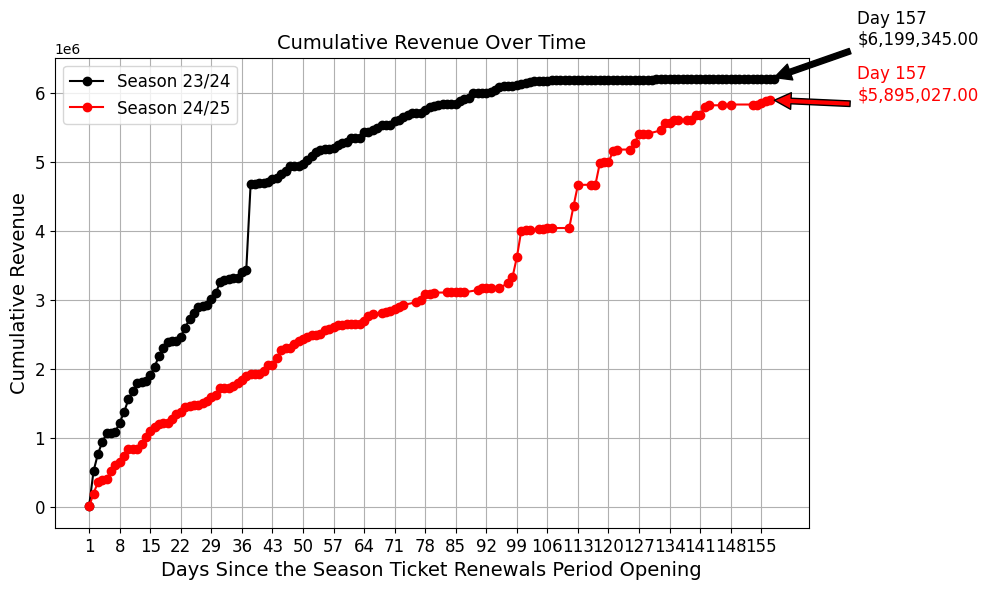

In [71]:
# Summing prices instead of counting tickets
# Adjusting for cumulative revenue instead of cumulative subscribers

# Process for season 23/24
daily_revenue_2324 = st_2324.groupby('sale_date')['price'].sum().reset_index(name='daily_revenue').rename(columns={'sale_date': 'Date'})
daily_revenue_2324['Cumulative Revenue'] = daily_revenue_2324['daily_revenue'].cumsum()
daily_revenue_2324 = daily_revenue_2324[daily_revenue_2324["Date"] >= pd.to_datetime("2023-06-25")]
daily_revenue_2324['Days Since Opening'] = (daily_revenue_2324['Date'] - daily_revenue_2324['Date'].min()).dt.days + 1
daily_revenue_2324["Date"] = pd.to_datetime(daily_revenue_2324["Date"])
daily_revenue_2324 = daily_revenue_2324[daily_revenue_2324['Days Since Opening'] < 160]

# Complete missing dates for season 23/24
full_date_range_2324 = pd.date_range(start=daily_revenue_2324['Date'].min(), end=daily_revenue_2324['Date'].max())
daily_revenue_2324 = daily_revenue_2324.set_index('Date').reindex(full_date_range_2324).reset_index()
daily_revenue_2324 = daily_revenue_2324.rename(columns={'index': 'Date'})
daily_revenue_2324['Days Since Opening'] = (daily_revenue_2324['Date'] - daily_revenue_2324['Date'].min()).dt.days + 1
daily_revenue_2324['daily_revenue'] = daily_revenue_2324['daily_revenue'].fillna(0)
daily_revenue_2324['Cumulative Revenue'] = daily_revenue_2324['Cumulative Revenue'].fillna(method='ffill').astype(float)

# Process for season 24/25
daily_revenue_2425 = perc.groupby('sale_date')['price'].sum().reset_index(name='daily_revenue').rename(columns={'sale_date': 'Date'})
daily_revenue_2425['Cumulative Revenue'] = daily_revenue_2425['daily_revenue'].cumsum()
daily_revenue_2425 = daily_revenue_2425[daily_revenue_2425["Date"] >= pd.to_datetime("2024-07-02")]
daily_revenue_2425['Days Since Opening'] = (daily_revenue_2425['Date'] - daily_revenue_2425['Date'].min()).dt.days + 1
daily_revenue_2425["Date"] = pd.to_datetime(daily_revenue_2425["Date"])

# Plot cumulative revenue comparison
plt.figure(figsize=(10, 6))
plt.plot(daily_revenue_2324['Days Since Opening'], daily_revenue_2324['Cumulative Revenue'], marker='o', color='black', label='Season 23/24')
plt.plot(daily_revenue_2425['Days Since Opening'], daily_revenue_2425['Cumulative Revenue'], marker='o', color='red', label='Season 24/25')
plt.xticks(range(1, daily_revenue_2324['Days Since Opening'].max() + 1, 7), fontsize=12)
plt.yticks(fontsize=12)

plt.title('Cumulative Revenue Over Time', fontsize=14)
plt.xlabel('Days Since the Season Ticket Renewals Period Opening', fontsize=14)
plt.ylabel('Cumulative Revenue', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.gca().set_facecolor('white') 

# Adding annotations for the last day number value and respective revenue value
last_day_2425 = daily_revenue_2425['Days Since Opening'].max()
last_day_revenue_2425 = daily_revenue_2425[daily_revenue_2425['Days Since Opening'] == last_day_2425]['Cumulative Revenue'].values[0]

# Find the corresponding revenue for daily_revenue_2324 on the same day as the last_day_2425
last_day_revenue_2324 = daily_revenue_2324[daily_revenue_2324['Days Since Opening'] == last_day_2425]['Cumulative Revenue'].values[0]

plt.annotate(f'Day {last_day_2425}\n${last_day_revenue_2425:,.2f}', 
             xy=(last_day_2425, last_day_revenue_2425), 
             xytext=(last_day_2425 + 20, last_day_revenue_2425), 
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.annotate(f'Day {last_day_2425}\n${last_day_revenue_2324:,.2f}', 
             xy=(last_day_2425, last_day_revenue_2324), 
             xytext=(last_day_2425 +20, last_day_revenue_2324 + 500000), 
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [51]:
5895027/6199345

0.9509112656256427

In [41]:
daily_data = st_2324.groupby('sale_date').sum()['price'].reset_index(name='daily_season_tickets').rename(columns={'sale_date': 'Date'})
daily_data['Cumulative Subscribers'] = daily_data['daily_season_tickets'].cumsum()
daily_data = daily_data[daily_data["Date"] >= pd.to_datetime("2023-06-25")]
daily_data['Days Since Opening'] = (daily_data['Date'] - daily_data['Date'].min()).dt.days + 1 
daily_data["Date"] = pd.to_datetime(daily_data["Date"])
daily_data = daily_data[daily_data['Days Since Opening'] < 160]

In [42]:
daily_data

,Date,daily_season_tickets,Cumulative Subscribers,Days Since Opening
0,2023-06-25,11800,11800,1
1,2023-06-26,501980,513780,2
2,2023-06-27,249150,762930,3
3,2023-06-28,173140,936070,4
4,2023-06-29,125060,1061130,5
...,...,...,...,...
105,2023-11-08,350,6194045,137
106,2023-11-16,2250,6196295,145
107,2023-11-22,2000,6198295,151
108,2023-11-26,1050,6199345,155
